In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


*Задание 1.3.1*

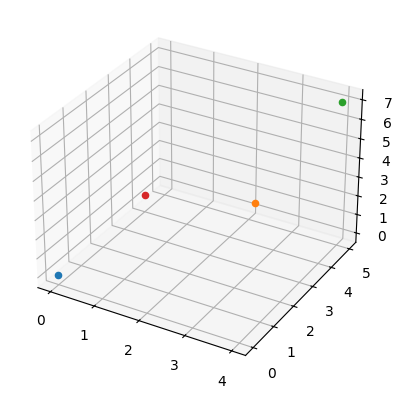

[np.float64(5.196152422706632), np.float64(90.0), np.float64(3.0), np.float64(7.0), np.float64(2.0)]


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
points = np.array([
    [0,0,0],
    [3,3,3],
    [4,5,7],
    [1,2,3]
])

for point in points:
    ax.scatter(point[0], point[1], point[2])
plt.show()

distances = []
# рассчитаем 5 расстояний, используя 5 метрик (1 - Евклидово, 2 - Квадрат евкл., 3 - Взвешененный евклид, 4 - Манхэттена, 5 - Чебышево)
distances.append(np.linalg.norm(points[0] - points[1]))
distances.append(np.linalg.norm(points[0] - points[2]) ** 2)
weights = np.array([0, 0, 1])
distances.append(sum((points[0] - points[3]) ** 2 * weights) ** 0.5)
distances.append(np.linalg.norm(points[1] - points[2], ord=1))
distances.append(np.linalg.norm(points[1] - points[3], ord=np.inf))
print(distances)

In [26]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


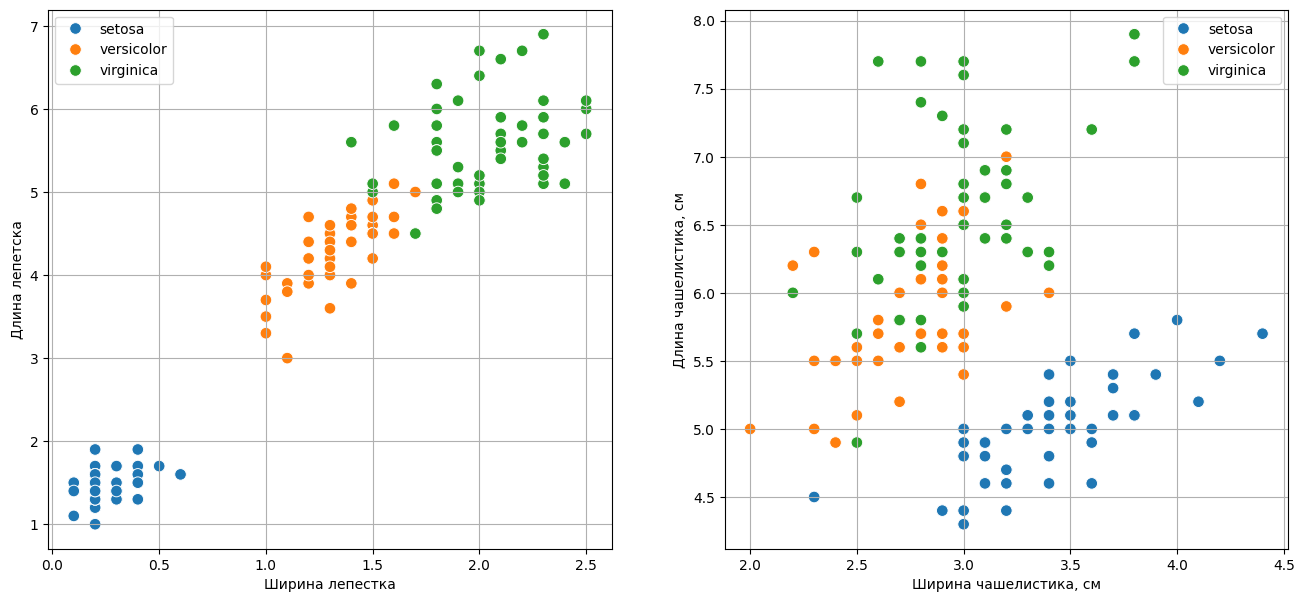

In [36]:
plt.figure(figsize=(16,7))

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Ширина лепестка')
plt.ylabel('Длина лепетска')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris,x='sepal_width',y='sepal_length',hue='species',s=70)
plt.xlabel('Ширина чашелистика, см')
plt.ylabel('Длина чашелистика, см')
plt.legend()
plt.grid()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((127, 4), (23, 4), (127,), (23,))

In [85]:
print(X_train.head())
print(Y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
62            6.0          2.2           4.0          1.0
70            5.9          3.2           4.8          1.8
13            4.3          3.0           1.1          0.1
74            6.4          2.9           4.3          1.3
117           7.7          3.8           6.7          2.2
62     versicolor
70     versicolor
13         setosa
74     versicolor
117     virginica
Name: species, dtype: object


In [86]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor'], dtype=object)

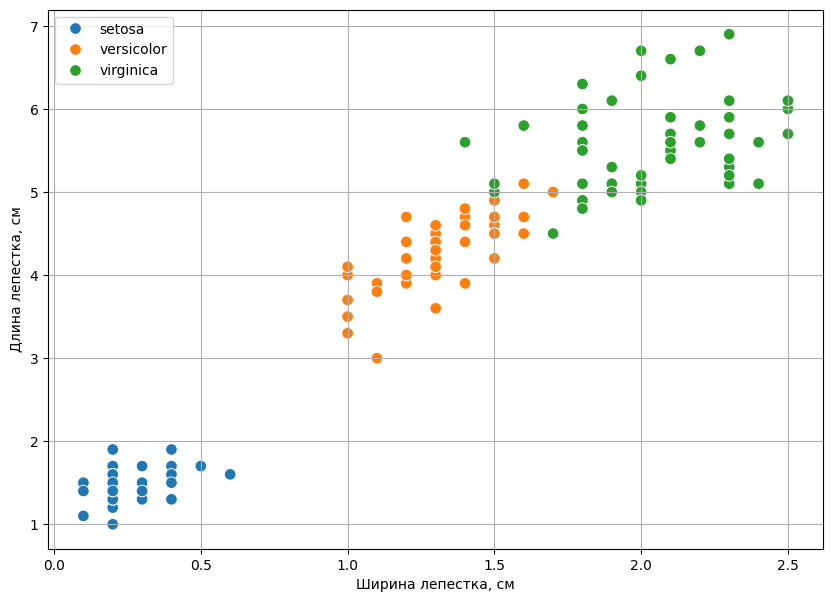

In [87]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Ширина лепестка, см')
plt.ylabel('Длина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(Y_test)):
    if np.array(Y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [88]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(Y_test, y_pred) :.3}')

accuracy: 1.0


*Задание 3.3.2*

In [8]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"eye_color" : 1, "height" : 170}, 
             {"eye_color" : 0, "height" : 160}, 
             {"eye_color" : 3, "height" : 180},
             {"eye_color" : 2, "height" : 175}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
print(features)

[[  1. 170.]
 [  0. 160.]
 [  3. 180.]
 [  2. 175.]]
